A classification problem involves predicting whether a sth is one thing or another
* `A binary clf` involves problems like predicting whether a patient has a heart disease or not.
* `A multi-class clf` involves problems like image clf
* `A multi-label clf` involves problems like predicting which category should be assugned to a wikipedia article, since one article can have more than one category

### What we're going to cover
<br>
Specifically, we're going to go through doing the following with TensorFlow:

Architecture of a classification model
<br>
Input shapes and output shapes
<br>
X: features/data (inputs)
<br>
y: labels (outputs)
<br>
<br>
"What class do the inputs belong to?"
<br>
Creating custom data to view and fit
<br>
Steps in modelling for binary and mutliclass classification
<br>
Creating a model
<br>
Compiling a model
<br>
Defining a loss function
<br>
<br>
Setting up an optimizer
<br>
Finding the best learning rate
<br>
Creating evaluation metrics
<br>
Fitting a model (getting it to find patterns in our data)
<br>
Improving a model
<br>
The power of non-linearity
<br>
Evaluating classification models
<br>
Visualizng the model ("visualize, visualize, visualize")
<br>
Looking at training curves
<br>
Compare predictions to ground truth (using our evaluation metrics)

#### Typical architecture of a classification neural network
The word typical is on purpose.

Because the architecture of a classification neural network can widely vary depending on the problem you're working on.

However, there are some fundamentals all deep neural networks contain:

An input layer.
Some hidden layers.
An output layer.
Much of the rest is up to the data analyst creating the model.

### Creating data to view and fit
<br>
We could start by importing a classification dataset but let's practice making some of our own classification data.

🔑 Note: It's a common practice to get you and model you build working on a toy (or simple) dataset before moving to your actual problem. Treat it as a rehersal experiment before the actual experiment(s).

Since classification is predicting whether something is one thing or another, let's make some data to reflect that.

To do so, we'll use Scikit-Learn's make_circles() function.

In [1]:
import tensorflow as tf

In [2]:
#making the dataset using make_circle()
from sklearn.datasets import make_circles

n_samples = 1000

X, y= make_circles(n_samples,
                  noise= 0.83,   #noise ~ Standard deviation of Gaussian noise added to the data
                  random_state= 42)

In [3]:
# check the shape of the data
X

array([[ 0.27267131,  0.83968161],
       [ 0.1289044 ,  0.7705694 ],
       [-1.3940632 ,  2.12036049],
       ...,
       [ 0.20989141, -1.45486587],
       [ 0.29208043, -1.79504584],
       [ 0.17538705,  1.10522827]])

In [4]:
#check the first ten label
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

Okay, we've seen some of our data and labels, how about we move towards visualizing?

🔑 Note: One important step of starting any kind of machine learning project is to become one with the data. And one of the best ways to do this is to visualize the data you're working with as much as possible. The data explorer's motto is "visualize, visualize, visualize".

We'll start with a DataFrame.

In [5]:
# start by making a dataset
import pandas as pd

# our X data has two values on each entry, so X0 contains all the data on X with the index of 0, same logic applied
#to the rest
circles = pd.DataFrame({'X0': X[:,0], 'X1': X[:, 1], 'label': y})

In [6]:
circles.head(5)

,X0,X1,label
0,0.272671,0.839682,1
1,0.128904,0.770569,1
2,-1.394063,2.120360,1
3,-1.809925,-0.133220,1
4,0.577991,-0.825208,0


In [7]:
# what about the labels
circles.label.value_counts()

0    500
1    500
Name: label, dtype: int64

Alright, looks like we're dealing with a binary classification problem. It's binary because there are only two labels (0 or 1).

If there were more label options (e.g. 0, 1, 2, 3 or 4), it would be called multiclass classification.

Let's take our visualization a step further and plot our data.

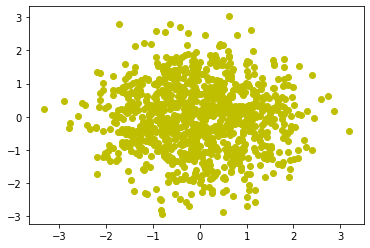

In [8]:
# visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:, 1], c='y', cmap=plt.cm.RdYlBu);

<br>

### Input and output shapes
One of the most common issues you'll run into when building neural networks is shape mismatches.

More specifically, the shape of the input data and the shape of the output data.

In our case, we want to input X and get our model to predict y.

So let's check out the shapes of X and y.

In [9]:
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
# mmh where do this number come from
len(X), len(y)

(1000, 1000)

In [11]:
# what about one entry in our dataset
X[0], y[0]

(array([0.27267131, 0.83968161]), 1)

Alright, so we've got two X features which lead to one y value.

This means our neural network input shape will has to accept a tensor with at least one dimension being two and output a tensor with at least one value.

🤔 Note: y having a shape of (1000,) can seem confusing. However, this is because all y values are actually scalars (single values) and therefore don't have a dimension. For now, think of your output shape as being at least the same value as one example of y (in our case, the output from our neural network has to be at least one value).

### Steps in modelling
Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

* Creating a model - piece together the layers of a neural network yourself (using the functional or sequential API) or import a previously built model (known as transfer learning).
* Compiling a model - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
* Fitting a model - letting the model try to find patterns in the data (how does X get to y).
Let's see these in action using the Sequential API to build a model for our regression data. And then we'll step through each.

In [12]:
# set the random seed
tf.random.set_seed(42)

# 1. create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss= tf.keras.losses.BinaryCrossentropy(),
             optimizer= tf.keras.optimizers.SGD(),
             metrics=['accuracy'])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 638us/step - loss: 2.1052 - accuracy: 0.4910
Epoch 2/5
32/32 [==============================] - 0s 473us/step - loss: 0.6987 - accuracy: 0.4860
Epoch 3/5
32/32 [==============================] - 0s 654us/step - loss: 0.6959 - accuracy: 0.4600
Epoch 4/5
32/32 [==============================] - 0s 811us/step - loss: 0.6949 - accuracy: 0.4880
Epoch 5/5
32/32 [==============================] - 0s 499us/step - loss: 0.6943 - accuracy: 0.4930


Looking at the accuracy metric, our model performs poorly (50% accuracy on a binary classification problem is the equivalent of guessing), but what if we trained it for longer?

In [13]:
# train the model to fit for longer
model.fit(X, y, epochs= 200, verbose= 0)
model.evaluate(X, y)

32/32 [==============================] - 0s 532us/step - loss: 0.6935 - accuracy: 0.4970


[0.6935018301010132, 0.4970000088214874]

Even after 200 passes of the data, it's still performing as if it's guessing.

What if we added an extra layer and trained for a little longer?

In [14]:
tf.random.set_seed(42)
model_1= tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model.compile(loss= tf.keras.losses.BinaryCrossentropy(),
             optimizer = tf.keras.optimizers.SGD(),
             metrics= ['accuracy'])

model.fit(X,y, epochs= 200, verbose= 0)
model.evaluate(X, y)

32/32 [==============================] - 0s 468us/step - loss: 0.6935 - accuracy: 0.4970


[0.6935018301010132, 0.4970000088214874]

Still not even as good as guessing (~50% accuracy)... hmm...?

Let's remind ourselves of a couple more ways we can use to improve our models.

### Improving a model
To improve our model, we can alter almost every part of the 3 steps we went through before.

* Creating a model - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
* Compiling a model - you might want to choose a different optimization function (such as the Adam optimizer, which is usually pretty good for many problems) or perhaps change the learning rate of the optimization function.
* Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer).

How about we try adding more neurons, an extra layer and our friend the Adam optimizer?

Surely doing this will result in predictions better than guessing...


In [15]:
tf.random.set_seed(42)
model_2= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss= tf.keras.losses.BinaryCrossentropy(),
             optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
             metrics= ['accuracy'])

model_2.fit(X,y, epochs= 200, verbose= 0)
model_2.evaluate(X, y)

32/32 [==============================] - 0s 439us/step - loss: 0.6934 - accuracy: 0.5030


[0.6934331059455872, 0.503000020980835]

Still!

We've pulled out a few tricks but our model isn't even doing better than guessing.

Let's make some visualizations to see what's happening.

🔑 Note: Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: visualize, visualize, visualize. Inspect your data, inspect your model, inpsect your model's predictions.

To visualize our model's predictions we're going to create a function plot_decision_boundary() which:

* Takes in a trained model, features (X) and labels (y).
* Creates a meshgrid of the different X values.
* Makes predictions across the meshgrid.
* Plots the predictions as well as a line between the different zones (where each unique class falls).

<br>
If this sounds confusing, let's see it in code and then see the output.

🔑 Note: If you're ever unsure of what a function does, try unraveling it and writing it line by line for yourself to see what it does. Break it into small parts and see what each part outputs.

In [16]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

Now we've got a function to plot our model's decision boundary (the cut off point its making between red and blue dots), let's try it out.

doing binary classifcation...


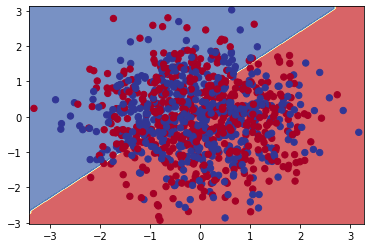

In [17]:
plot_decision_boundary(model_2, X, y)

Looks like our model is trying to draw a straight line through the data.

What's wrong with doing this?

The main issue is our data isn't separable by a straight line.

In a regression problem, our model might work. In fact, let's try it.

In [18]:
# set random seed
tf.random.set_seed(42)

#create some regression data
x_regression= np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

#split it into training and testing set
x_train_reg = x_regression[:150]
x_test_reg = x_regression[150:]
y_train_reg = y_regression[:150]
y_test_reg = y_regression[150:]

In [19]:
# recreate the model for regression

tf.random.set_seed(42)

model_2= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss= tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
             metrics= ['mae'])

model_2.fit(x_train_reg, y_train_reg, epochs= 200, verbose= 0)
model_2.evaluate(x_train_reg, y_train_reg)

5/5 [==============================] - 0s 798us/step - loss: 27.2020 - mae: 27.2020


[27.2020263671875, 27.2020263671875]

Okay, it seems like our model is learning something (the mae value trends down with each epoch), let's plot its predictions.

In [20]:
y_reg_pred = model_2.predict(y_test_reg)

In [21]:
y_reg_pred.shape

(50, 1)

In [22]:
x_test_reg.shape, y_reg_pred.shape

((50,), (50, 1))

So when you're making a plot, remember to squeze y_reg_pred to be on the same dimensions as the others

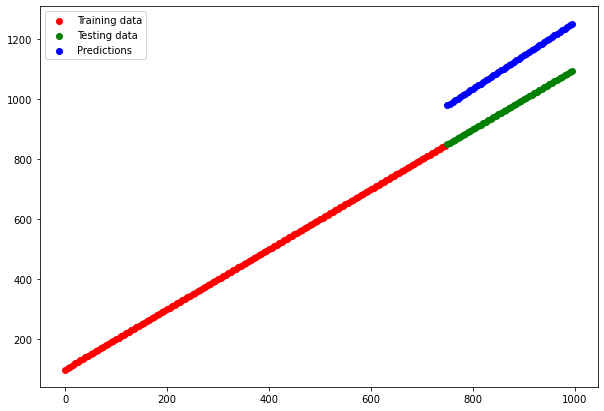

In [23]:
# plot the figure for the predictions
plt.figure(figsize= (10, 7))
plt.scatter(x_train_reg, y_train_reg, c= 'r', label= 'Training data')
plt.scatter(x_test_reg, y_test_reg, c= 'g', label= 'Testing data')
plt.scatter(x_test_reg, y_reg_pred.squeeze(), c= 'b', label= 'Predictions')
plt.legend();

Okay, the predictions aren't perfect (if the predictions were perfect, the red would line up with the green), but they look better than complete guessing.

So this means our model must be learning something...

There must be something we're missing out on for our classification problem.


### The missing piece: Non-linearity
Okay, so we saw our neural network can model straight lines (with ability a little bit better than guessing).

What about non-straight (non-linear) lines?

If we're going to model our classification data (the red and clue circles), we're going to need some non-linear lines.

The main change we'll add to models we've built before is the use of the `activation` keyword

In [24]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation= tf.keras.activations.linear),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss= tf.keras.losses.binary_crossentropy,
               optimizer= tf.keras.optimizers.Adam(lr= 0.001),
               metrics= ['accuracy'])

history= model_4.fit(x_train_reg, y_train_reg, epochs= 200, verbose= 0)
model_4.evaluate(x_train_reg, y_train_reg)

5/5 [==============================] - 0s 1ms/step - loss: -7169.6685 - accuracy: 0.0000e+00


[-7169.66845703125, 0.0]

In [25]:
#let's create a model with three hidden layers
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation= tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation= tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

model_5.compile(loss= tf.keras.losses.binary_crossentropy,
               optimizer= tf.keras.optimizers.Adam(lr= 0.001),
               metrics= ['accuracy'])
history= model_5.fit(X, y, epochs= 200, verbose= 0)


In [26]:
model_5.evaluate(X, y)

32/32 [==============================] - 0s 448us/step - loss: 0.6783 - accuracy: 0.5650


[0.678252100944519, 0.5649999976158142]

doing binary classifcation...


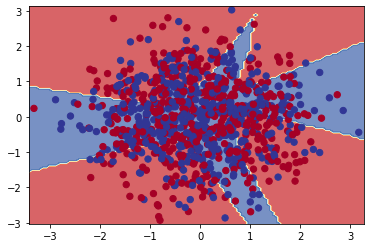

In [27]:
plot_decision_boundary(model_5, X, y)

This time we'll change the activation function on our output layer too. Remember the architecture of a classification model? For binary classification, the output layer activation is usually the Sigmoid activation function.

In [28]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(5, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr= 0.001),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=100, verbose=0)

In [29]:
# evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 484us/step - loss: 0.6851 - accuracy: 0.5520


[0.6851320862770081, 0.5519999861717224]

doing binary classifcation...


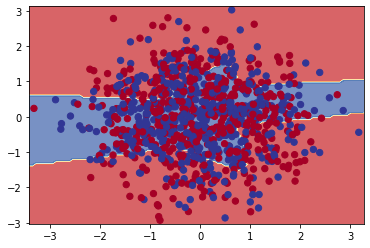

In [30]:
plot_decision_boundary(model_7, X, y)

Nice! It looks like our model is almost perfectly (apart from a few examples) separating the two circles.

🤔 Question: What's wrong with the predictions we've made? Are we really evaluating our model correctly here? Hint: what data did the model learn on and what did we predict on?

Before we answer that, it's important to recognize what we've just covered.

🔑 Note: The combination of linear (straight lines) and non-linear (non-straight lines) functions is one of the key fundamentals of neural networks.

Think of it like this:

If I gave you an unlimited amount of straight lines and non-straight lines, what kind of patterns could you draw?

That's essentially what neural networks do to find patterns in data.

Now you might be thinking, "but I haven't seen a linear function or a non-linear function before..."

Oh but you have.

We've been using them the whole time.

They're what power the layers in the models we just built.

To get some intuition about the activation functions we've just used, let's create them and then try them on some toy data.

## Evaluating and improving our classification model


We've been evaluating our model on the same data it was trained on.

A better approach would be to split our data into training, validation (optional) and test sets.

Once we've done that, we'll train our model on the training set (let it find patterns in the data) and then see how well it learned the patterns by using it to predict values on the test set.

Let's do it.

In [31]:
# how many samples are in the whole dataset
len(X)

1000

In [32]:
# split the data into train and test set
x_train, y_train= X[:800], y[:800]
x_test, y_test = X[800:], y[800:]

#check the shapes of the data
x_train.shape, x_test.shape

((800, 2), (200, 2))

Great, now we've got training and test sets, let's model the training data and evaluate what our model has learned on the test set

In [41]:
tf.random.set_seed(42)

model_8= tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation= 'relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_8.compile(loss= tf.keras.losses.binary_crossentropy,
               optimizer= tf.keras.optimizers.Adam(lr= 0.01),
               metrics= ['accuracy'])

history= model_8.fit(x_train, y_train, epochs= 200, verbose= 0)

In [42]:
#evaluate the model on the test_set
loss, accuracy = model_8.evaluate(x_test, y_test)
print('The model loss is ' + str(loss))
print('The model accuracy is ' + str(accuracy*100))

7/7 [==============================] - 0s 1ms/step - loss: 0.7078 - accuracy: 0.4750
The model loss is 0.7078470587730408
The model accuracy is 47.49999940395355


## Plot the loss curves

But how did our model go whilst it was learning?

As in, how did the performance change everytime the model had a chance to look at the data (once every epoch)?

To figure this out, we can check the loss curves (also referred to as the learning curves).

You might've seen we've been using the variable history when calling the fit() function on a model (fit() returns a History object).

This is where we'll get the information for how our model is performing as it learns.

Let's see how we might use it.

In [43]:
# you can access the history of the model learning by calling the .history method
pd.DataFrame(history.history)

,loss,accuracy
0,0.697200,0.49250
1,0.693442,0.49000
2,0.691925,0.50125
3,0.691478,0.51625
4,0.691779,0.52875
...,...,...
195,0.676101,0.58875
196,0.675841,0.57625
197,0.674695,0.58125
198,0.676873,0.57625


Text(0.5, 1.0, 'model_8_learning_curves')

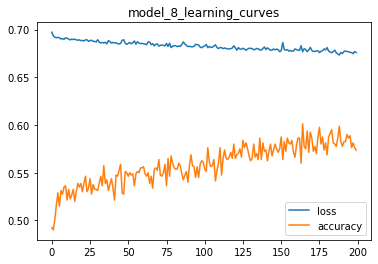

In [44]:
#plotting the loss curves
pd.DataFrame(history.history).plot()
plt.title('model_8_learning_curves')

🔑 Note: For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the best learning rate
Aside from the architecture itself (the layers, number of neurons, activations, etc), the most important hyperparameter you can tune for your neural network models is the learning rate.

In model_8 you saw we lowered the Adam optimizer's learning rate from the default of 0.001 (default) to 0.01.

And you might be wondering why we did this.

Put it this way, it was a lucky guess.

I just decided to try a lower learning rate and see how the model went.

Now you might be thinking, "Seriously? You can do that?"

And the answer is yes. You can change any of the hyperparamaters of your neural networks.

With practice, you'll start to see what kind of hyperparameters work and what don't.

That's an important thing to understand about machine learning and deep learning in general. It's very experimental. You build a model and evaluate it, build a model and evaluate it.

That being said, I want to introduce you a trick which will help you find the optimal learning rate (at least to begin training with) for your models going forward.

To do so, we're going to use the following:

A learning rate callback.
You can think of a callback as an extra piece of functionality you can add to your model while its training.
Another model (we could use the same ones as above, we we're practicing building models here).
A modified loss curves plot.
We'll go through each with code, then explain what's going on.

🔑 Note: The default hyperparameters of many neural network building blocks in TensorFlow are setup in a way which usually work right out of the box (e.g. the Adam optimizer's default settings can usually get good results on many datasets). So it's a good idea to try the defaults first, then adjust as needed.

In [45]:
# create the modelthe same as model_8

tf.random.set_seed(42)

model_9= tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_9.compile(loss= 'binary_crossentropy',
               optimizer= 'Adam',
               metrics= ['accuracy'])

#create a learning rate scheduler callback
lr_scheduler= tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
# the above line traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

#fit the model and by passing the lr_scheduler on the call back
history= model_9.fit(x_train, y_train, epochs= 200, 
                    verbose= 0,
                    callbacks= [lr_scheduler])

<AxesSubplot:xlabel='epochs'>

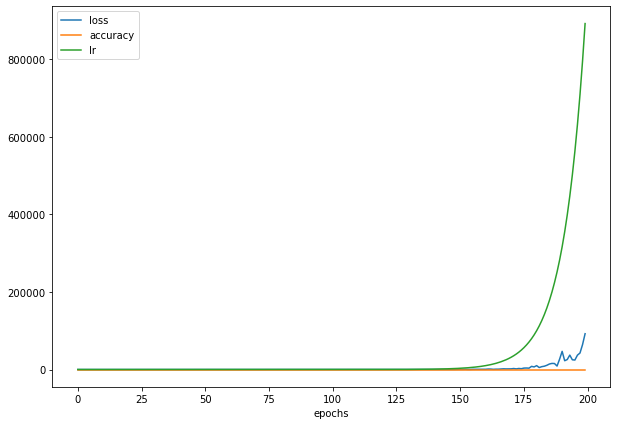

In [49]:
pd.DataFrame(history.history).plot(xlabel= 'epochs', figsize= (10,7))

As you you see the learning rate exponentially increases as the number of epochs increases.

And you can see the model's accuracy goes up (and loss goes down) at a specific point when the learning rate slowly increases.

To figure out where this infliction point is, we can plot the loss versus the log-scale learning rate.